In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
#print(check_output(["ls","C:\\Users\EBRU\Documents\machineLearning\week4"]).decode("utf8"))

In [2]:
data=pd.read_csv('C:\\Users\EBRU\Documents\machineLearning\week4\column_2C_weka.csv')
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


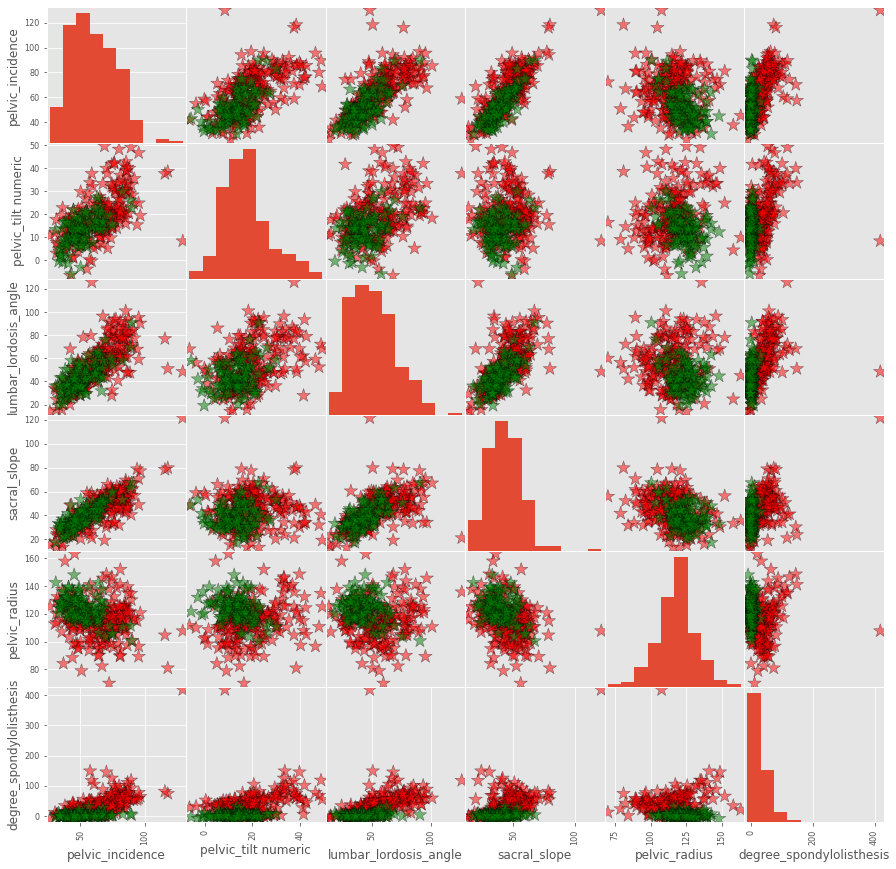

In [6]:
color_list=['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:,data.columns != 'class'],
                           c=color_list,
                           figsize=[15,15],
                           diagonal='hist',
                           alpha=0.5,
                           s=200,
                           marker='*',
                           edgecolor="black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

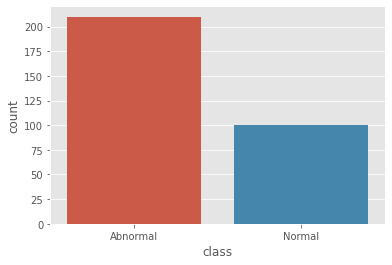

In [7]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

In [8]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
x,y= data.loc[:, data.columns !='class'], data.loc[:,'class']
knn.fit(x,y)
prediction=knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1)
knn=KNeighborsClassifier(n_neighbors=3)
x,y=data.loc[:,data.columns!='class'], data.loc[:,'class']
knn.fit(x_train, y_train)
prediction=knn.predict(x_test)
print('With KNN(K=3) accuracy is:', knn.score(x_test, y_test)) #accuracy(kesinlik/doğruluk)

With KNN(K=3) accuracy is: 0.8602150537634409


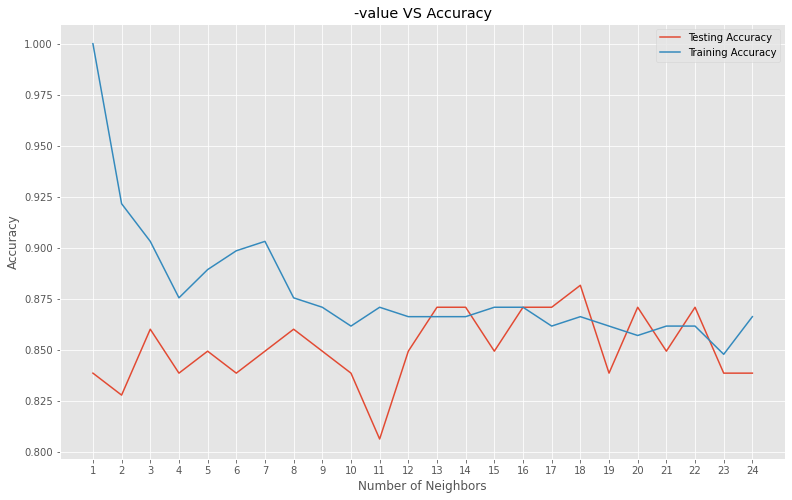

Best accuracy is 0.8817204301075269 with K=18


In [10]:
#Model complexity
neig=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]

for i, k in enumerate(neig):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label='Testing Accuracy')
plt.plot(neig, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

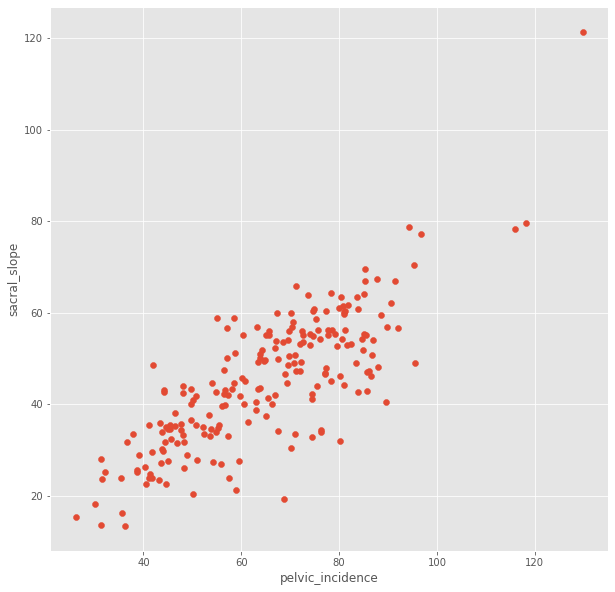

In [11]:
#REGRESSION
data1=data[data['class']=='Abnormal']
x=np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y=np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

#Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score: 0.6458410481075871


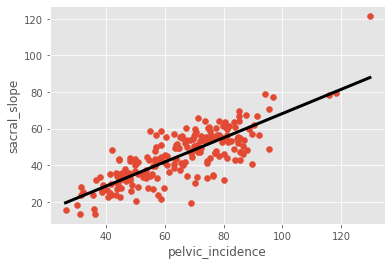

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

predict_space=np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x,y)
predicted=reg.predict(predict_space)
print('R^2 score:', reg.score(x,y))
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [13]:
#Cross Validation
from sklearn.model_selection import cross_val_score
reg=LinearRegression()
k=5
cv_result=cross_val_score(reg,x,y,cv=k) #uses R^2 as score
print('CV Scores:', cv_result)
print('CV Scores average:', np.sum(cv_result)/k)

CV Scores: [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV Scores average: 0.3931462502884869


In [14]:
#Ridge
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=2, test_size=0.3)
ridge=Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_predict= ridge.predict(x_test)
print('Ridge score:', ridge.score(x_test, y_test))

Ridge score: 0.5608287918841998


In [15]:
#Lasso
from sklearn.linear_model import Lasso
x=np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=3, test_size=0.3)
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
ridge_predict=lasso.predict(x_test)
print('Lasso score:', lasso.score(x_test, y_test))
print('Lasso coefficients:', lasso.coef_)

Lasso score: 0.9640334804327546
Lasso coefficients: [ 0.82498243 -0.7209057   0.         -0.        ]


In [16]:
#confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
x,y=data.loc[:,data.columns !='class'], data.loc[:,'class']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=1)
rf=RandomForestClassifier(random_state=4)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



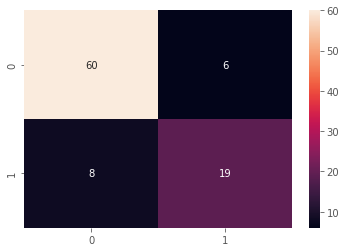

In [17]:
#visualize with seaborn library
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

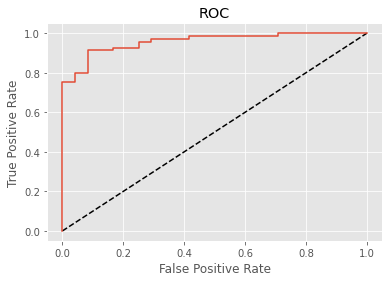

In [21]:
#ROC Curve with Logistic Regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#abnormal=1, normal=0
data['class_binary']=[1 if i=='Abnormal' else 0 for i in data.loc[:,'class']]
x,y= data.loc[:,(data.columns!= 'class')&(data.columns !='class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob=logreg.predict_proba(x_test)[:,1]
fpr, tpr, thesholds= roc_curve(y_test, y_pred_prob)
#Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
grid={'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv= GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)

#Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


In [30]:
#grid search cross validation with 2 hyperparameter
#1. hyperparameter is c:logistic regression regularization parameter
#2. penalty l1 or l2

param_grid={'C': np.logspace(-3, 3, 7), 'penalty':['l1', 'l2']}
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=12)
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg, param_grid, cv=3)
logreg_cv.fit(x_train, y_train)

print("Tuned hyperparameters: {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


In [32]:
data=pd.read_csv('C:\\Users\EBRU\Documents\machineLearning\week4\column_2C_weka.csv')
df=pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps=[('scalar', StandardScaler()),
      ('SVM',SVC())]
pipeline=Pipeline(steps)
parameters={'SVM__C':[1, 10, 100],
           'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=1)
cv=GridSearchCV(pipeline, param_grid=parameters, cv=3)
cv.fit(x_train, y_train)
y_pred=cv.predict(x_test)

print("Accuracy:{}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy:0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


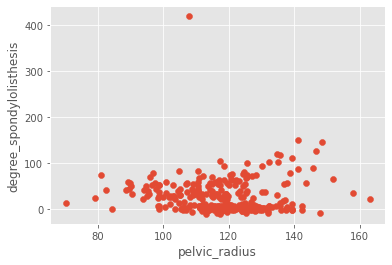

In [36]:
#there is no labels in data
data=pd.read_csv('C:\\Users\EBRU\Documents\machineLearning\week4\column_2C_weka.csv')
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

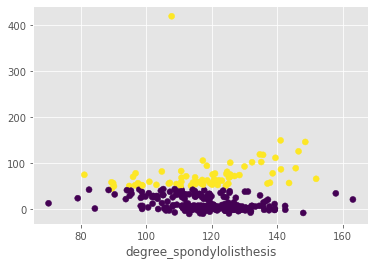

In [44]:
#KMeans Clustering
data2=data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data2)
labels=kmeans.predict(data2)
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'],c=labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [46]:
df=pd.DataFrame({'labels':labels, "class":data['class']})
ct=pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


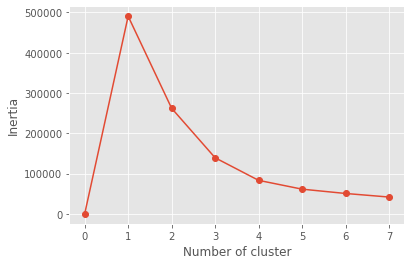

In [47]:
#inertia
inertia_list=np.empty(8)
for i in range(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i]=kmeans.inertia_
plt.plot(range(0,8), inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Standardization
